In [ ]:
- describe system
- 
- compute eigenvalues
- compute eigenvectors
- vs speed
- modes
- investigate how parameters affect system
- non-minimum phase

One of the simplest models that can predict the fundamental free motion of a bicycle or motorcycle takes the following form:

$$
\mathbf{M\ddot{q}}
+v\mathbf{C}_1\mathbf{\dot{q}}
+\left[g\mathbf{K}_0
+v^2\mathbf{K}_2\right]\mathbf{q}
=0
$$

where

$$
\mathbf{q} =
[\delta \quad \phi]^T
$$

$\delta$ is a generalized coordinate that tracks the angle between the front frame (handlebar/fork) and the rear frame (frame, seat, etc) and $\phi$ is a genearlized coordinate that tracks the roll angle of the rear frame relative to the ground. If each of these are zero the bicycle is standing upright and the steering is pointed straight ahead. Positive steer angle is to the right and negative steer angle is to the left.

The system has a mass matrix, $\mathbf{M}$, and effective damping and stiffness matrices that are parameterized by the speed of the bicycle $v$ and the acceleration due to gravity $g$. Typical values for the four matrices in SI units are:

$$
\mathbf{M} =
\begin{bmatrix}
80.81722 & 2.31941332208709 \\
2.31941332208709 & 0.29784188199686
\end{bmatrix}
$$

$$
\mathbf{K}_0 =
\begin{bmatrix}
-80.95 & -2.599516 852 498 72 \\
-2.599516 852 498 72 & -0.803 294 884 586 18
\end{bmatrix}
$$

$$
\mathbf{K}_2 =
\begin{bmatrix}
0 & 76.597 345 895 732 22 \\
0 & 2.654 315 237 946 04
\end{bmatrix}
$$

$$
\mathbf{C}_1 =
\begin{bmatrix}
0 & 33.866 414 914 924 94 \\
-0.850 356 414 569 78 & 1.685 403 973 975 60
\end{bmatrix}
$$

The speed $v$ is in meters per second and $g$ is in meters per second squared.

In [1]:
import numpy as np

# Eigenvalues and Eigenvectors

In the previous class we learned that the free response of the system can be formulated by solving an eigenvalue problem. This applies to systems with or without damping. All scientific computing software provides efficient numerical routines to compute the eigenvalues and eigenvectors of a square matrix. In Python you can use `numpy.linalg.eig`. This computation requires that the system be in state space form:

$$\dot{\mathbf{x}} = \mathbf{A} \mathbf{x}$$

where $\mathbf{x}$ is the state vector.

# Exercise

Write a function that takes the matrices $\mathbf{M,K_0, K_2, C_1}$, the speed, and gravity as an input and returns the A matrix.

In [2]:
def compute_state_matrix(v, g, M, C1, K0, K2):
    """Returns the state matrix.
    
    Parameters
    ----------
    v : float
        Bicycle speed in meters per second.
    g : float
        Acceleration due to gravity in meters per second squared.
    M : array_like, shape(2,2)
        The mass matrix.
    C1 : array_like, shape(2,2)
        The speed proportional damping matrix.
    K0 : array_like, shape(2,2)
        The gravity proportional stiffness matrix.
    K2 : array_like, shape(2,2)
        The speed squared proportional stiffness matrix.
    
    Returns
    -------

    As : ndarray, shape(n,4,4)
        The state matrices evaluated at each speed in `speeds`.

    Notes
    -----
    The second order equations of motion take this form:
    
    M * q'' + v * C1 * q' + [g * K0 + v**2 * K2] * q' = 0
    
    where q = [roll angle,
               steer angle]
    
    The first order equations of motion take this form:
    
    x' = A * x + B * u
    
    where x = [roll angle,
               steer angle,
               roll rate,
               steer rate]

    """
    
    # write your code here
    invM = (1. / (M[0, 0] * M[1, 1] - M[0, 1] * M[1, 0]) *
            np.array([[M[1, 1], -M[0, 1]], [-M[1, 0], M[0, 0]]], dtype=M.dtype))

    a11 = np.zeros((2, 2))
    a12 = np.eye(2)
    # stiffness based terms
    a21 = -np.dot(invM, (g * K0 + v**2 * K2))
    # damping based terms
    a22 = -np.dot(invM, v * C1)

    A = np.vstack((np.hstack((a11, a12)), np.hstack((a21, a22))))
    
    return A

Create a state matrix for $v=5.4 m/s$ and $g=9.81$. This is about normal riding speed around town (12 mph).

In [3]:
M = np.array([[ 80.81722   ,   2.31941332],
              [  2.31941332,   0.29784188]])
C1 = np.array([[  0.        ,  33.86641391],
               [ -0.85035641,   1.68540397]])
K0 = np.array([[-80.95      ,  -2.59951685],
               [ -2.59951685,  -0.80329488]])
K2 = np.array([[  0.        ,  76.5973459 ],
               [  0.        ,   2.65431524]])

A = compute_state_matrix(5.4, 9.81, M, C1, K0, K2)
A

array([[  0.        ,   0.        ,   1.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.        ],
       [  9.48977444, -26.55884919,  -0.56982123,  -1.78478315],
       [ 11.71947695, -26.58645938,  19.85474831, -16.65827391]])

Now compute the eigenvalues and eigenvectors of the the system using `numpy.linalg.eig` for $v=5.4 m/s$ and $g=9.81$. This is about normal riding speed around town (12 mph).

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [5]:
eigenvalues, eigenvectors

(array([ -0.14870825+0.j        ,  -1.10367065+5.04378116j,
         -1.10367065-5.04378116j, -14.87204560+0.j        ]),
 array([[  9.29671777e-01+0.j        ,   1.13626581e-02+0.11267223j,
           1.13626581e-02-0.11267223j,   5.10816269e-06+0.j        ],
        [  3.37749462e-01+0.j        ,   3.26515045e-02+0.14921756j,
           3.26515045e-02-0.14921756j,  -6.70887540e-02+0.j        ],
        [ -1.38249862e-01+0.j        ,  -5.80834707e-01-0.06704227j,
          -5.80834707e-01+0.06704227j,  -7.59688284e-05+0.j        ],
        [ -5.02261309e-02+0.j        ,  -7.88657235e-01+0.j        ,
          -7.88657235e-01-0.j        ,   9.97747009e-01+0.j        ]]))

In [6]:
eigenvalues

array([ -0.14870825+0.j        ,  -1.10367065+5.04378116j,
        -1.10367065-5.04378116j, -14.87204560+0.j        ])

In [9]:
eigenvectors.shape

(4, 4)

In [10]:
eigenvectors[:, 0]

array([ 0.92967178+0.j,  0.33774946+0.j, -0.13824986+0.j, -0.05022613+0.j])

Examine the eigenvalues.

- Stability
- Real and imaginary
- Superposition

In [ ]:
Plot eigenvectors on polar plot

In [26]:
np.linalg.eig?

In [21]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [31]:
eigenvectors[:2, 0]

array([ 0.92967178+0.j,  0.33774946+0.j])

<IPython.core.display.Javascript object>


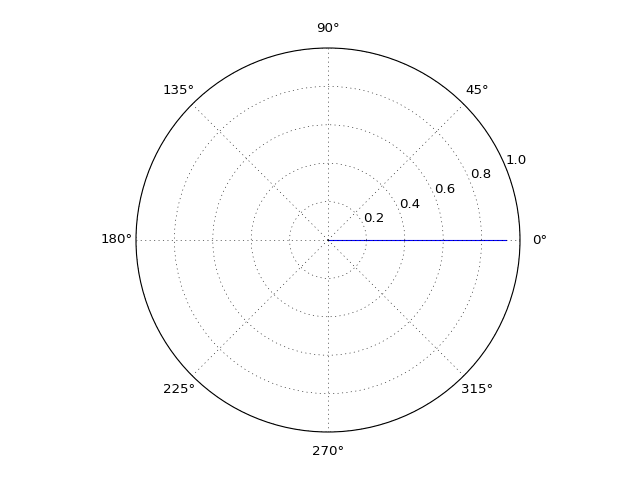

In [32]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'polar'})
radius = np.sqrt(np.real(eigenvectors[0, 0])**2 + np.imag(eigenvectors[0, 1])**2)
radius = np.abs(eigenvectors[0, 0])
theta = np.angle(eigenvectors[0, 0])
ax.plot([0, theta], [0, radius])

# Exercise

Make polar phasor plots for each of the eigenvalues.

# Exercise

Plot the 

In [ ]:
def benchmark_parameters():
    """Returns the benchmark bicycle parameters from [Meijaard2007]_.
    References
    ----------
    .. [Meijaard2007]_ J. P. Meijaard, Jim M. Papadopoulos, Andy Ruina, and A.
       L. Schwab. Linearized dynamics equations for the balance and steer of a
       bicycle: A benchmark and review. Proceedings of the Royal Society A:
       Mathematical, Physical and Engineering Sciences, 463(2084):1955–1982,
       August 2007.
    """

    p = {}

    p['w'] = 1.02
    p['c'] = 0.08
    p['lam'], p['lambda'] = pi / 10., pi / 10.
    p['g'] = 9.81
    p['rR'] = 0.3
    p['mR'] = 2.0
    p['IRxx'] = 0.0603
    p['IRyy'] = 0.12
    p['xB'] = 0.3
    p['zB'] = -0.9
    p['mB'] = 85.0
    p['IBxx'] = 9.2
    p['IByy'] = 11.0
    p['IBzz'] = 2.8
    p['IBxz'] = 2.4
    p['xH'] = 0.9
    p['zH'] = -0.7
    p['mH'] = 4.0
    p['IHxx'] = 0.05892
    p['IHyy'] = 0.06
    p['IHzz'] = 0.00708
    p['IHxz'] = -0.00756
    p['rF'] = 0.35
    p['mF'] = 3.0
    p['IFxx'] = 0.1405
    p['IFyy'] = 0.28

return p

In [ ]:
def benchmark_par_to_canonical(p):
    """
    Returns the canonical matrices of the Whipple bicycle model linearized
    about the upright constant velocity configuration. It uses the parameter
    definitions from [Meijaard2007]_.
    Parameters
    ----------
    p : dictionary
        A dictionary of the benchmark bicycle parameters. Make sure your units
        are correct, best to ue the benchmark paper's units!
    Returns
    -------
    M : ndarray, shape(2,2)
        The mass matrix.
    C1 : ndarray, shape(2,2)
        The damping like matrix that is proportional to the speed, v.
    K0 : ndarray, shape(2,2)
        The stiffness matrix proportional to gravity, g.
    K2 : ndarray, shape(2,2)
        The stiffness matrix proportional to the speed squared, v**2.
    """
    mT = p['mR'] + p['mB'] + p['mH'] + p['mF']
    xT = (p['xB'] * p['mB'] + p['xH'] * p['mH'] + p['w'] * p['mF']) / mT
    zT = (-p['rR'] * p['mR'] + p['zB'] * p['mB'] +
          p['zH'] * p['mH'] - p['rF'] * p['mF']) / mT

    ITxx = (p['IRxx'] + p['IBxx'] + p['IHxx'] + p['IFxx'] + p['mR'] *
            p['rR']**2 + p['mB'] * p['zB']**2 + p['mH'] * p['zH']**2 + p['mF']
            * p['rF']**2)
    ITxz = (p['IBxz'] + p['IHxz'] - p['mB'] * p['xB'] * p['zB'] -
            p['mH'] * p['xH'] * p['zH'] + p['mF'] * p['w'] * p['rF'])
    p['IRzz'] = p['IRxx']
    p['IFzz'] = p['IFxx']
    ITzz = (p['IRzz'] + p['IBzz'] + p['IHzz'] + p['IFzz'] +
            p['mB'] * p['xB']**2 + p['mH'] * p['xH']**2 + p['mF'] * p['w']**2)

    mA = p['mH'] + p['mF']
    xA = (p['xH'] * p['mH'] + p['w'] * p['mF']) / mA
    zA = (p['zH'] * p['mH'] - p['rF'] * p['mF']) / mA

    IAxx = (p['IHxx'] + p['IFxx'] + p['mH'] * (p['zH'] - zA)**2 +
            p['mF'] * (p['rF'] + zA)**2)
    IAxz = (p['IHxz'] - p['mH'] * (p['xH'] - xA) * (p['zH'] - zA) + p['mF'] *
            (p['w'] - xA) * (p['rF'] + zA))
    IAzz = (p['IHzz'] + p['IFzz'] + p['mH'] * (p['xH'] - xA)**2 + p['mF'] *
            (p['w'] - xA)**2)
    uA = (xA - p['w'] - p['c']) * cos(p['lam']) - zA * sin(p['lam'])
    IAll = (mA * uA**2 + IAxx * sin(p['lam'])**2 +
            2 * IAxz * sin(p['lam']) * cos(p['lam']) +
            IAzz * cos(p['lam'])**2)
    IAlx = (-mA * uA * zA + IAxx * sin(p['lam']) + IAxz *
            cos(p['lam']))
    IAlz = (mA * uA * xA + IAxz * sin(p['lam']) + IAzz *
            cos(p['lam']))

    mu = p['c'] / p['w'] * cos(p['lam'])

    SR = p['IRyy'] / p['rR']
    SF = p['IFyy'] / p['rF']
    ST = SR + SF
    SA = mA * uA + mu * mT * xT

    Mpp = ITxx
    Mpd = IAlx + mu * ITxz
    Mdp = Mpd
    Mdd = IAll + 2 * mu * IAlz + mu**2 * ITzz
    M = np.array([[Mpp, Mpd], [Mdp, Mdd]])

    K0pp = mT * zT  # this value only reports to 13 digit precision it seems?
    K0pd = -SA
    K0dp = K0pd
    K0dd = -SA * sin(p['lam'])
    K0 = np.array([[K0pp, K0pd], [K0dp, K0dd]])

    K2pp = 0.
    K2pd = (ST - mT * zT) / p['w'] * cos(p['lam'])
    K2dp = 0.
    K2dd = (SA + SF * sin(p['lam'])) / p['w'] * cos(p['lam'])
    K2 = np.array([[K2pp, K2pd], [K2dp, K2dd]])

    C1pp = 0.
    C1pd = (mu * ST + SF * cos(p['lam']) + ITxz / p['w'] *
            cos(p['lam']) - mu*mT*zT)
    C1dp = -(mu * ST + SF * cos(p['lam']))
    C1dd = (IAlz / p['w'] * cos(p['lam']) + mu * (SA +
            ITzz / p['w'] * cos(p['lam'])))
    C1 = np.array([[C1pp, C1pd], [C1dp, C1dd]])

return M, C1, K0, K2